<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [64]:
# insert code here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [78]:
# insert code here
diabetes = datasets.load_diabetes() 
diabetes.keys()  # to find the content of data

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [81]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [82]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [79]:
df = pd.DataFrame(diabetes['data'],columns = diabetes['feature_names']) #putting our data in a Dataframe

In [80]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## Exploratory Data Analysis

In [48]:
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [49]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [77]:
df.shape

(442, 10)

In [50]:
df.describe().T

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


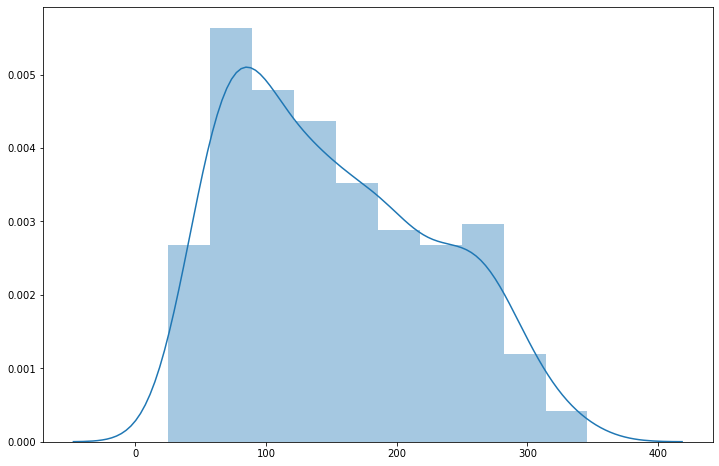

In [65]:
plt.figure(figsize=(12,8))
sns.distplot(diabetes['target'])

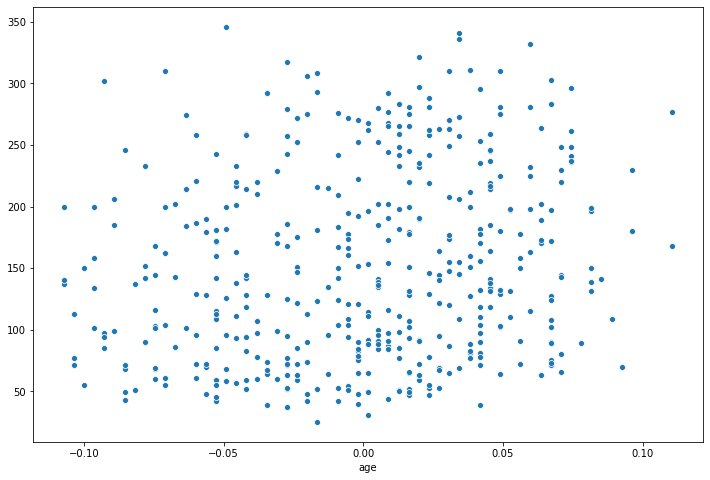

In [83]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y=diabetes['target'],data=df)

In [127]:
442-133

309

### Prepare input data

### Split the data (training/test)

In [68]:
X = df    
y = diabetes['target']

In [70]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [62]:
# insert code here
from sklearn.model_selection import train_test_split #to split our data into training and testing set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 13) #splitting our data

### Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [86]:
X_train.shape

(309, 10)

In [87]:
X_test.shape

(133, 10)

### Create the model's architecture

In [89]:
# insert code here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

### Compile the model

In [135]:
# insert code here
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

### Fit the training data

In [160]:
%%time
# insert code here
model.fit(x=X_train,y=y_train.ravel(),
          validation_data=(X_test,y_test.ravel()),
          batch_size=100,epochs=1000)#the lower the batches,more the training time and less likely to overfit our data

Epoch 1/1000
4/4 [==============================] - 0s 27ms/step - loss: 2462.9163 - val_loss: 3222.5747
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 2478.2908 - val_loss: 3223.7771
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 2466.5640 - val_loss: 3222.2881
Epoch 4/1000
4/4 [==============================] - 0s 9ms/step - loss: 2451.9016 - val_loss: 3235.0376
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 2473.2354 - val_loss: 3265.6567
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 2498.0630 - val_loss: 3284.1758
Epoch 7/1000
4/4 [==============================] - 0s 11ms/step - loss: 2505.5322 - val_loss: 3250.2678
Epoch 8/1000
4/4 [==============================] - 0s 11ms/step - loss: 2484.5452 - val_loss: 3215.1230
Epoch 9/1000
4/4 [==============================] - 0s 12ms/step - loss: 2457.2256 - val_loss: 3210.3499
Epoch 10/1000
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 9ms/step - loss: 2445.0847 - val_loss: 3239.6194
Epoch 79/1000
4/4 [==============================] - 0s 12ms/step - loss: 2443.4373 - val_loss: 3236.5457
Epoch 80/1000
4/4 [==============================] - 0s 10ms/step - loss: 2443.5447 - val_loss: 3234.7974
Epoch 81/1000
4/4 [==============================] - 0s 11ms/step - loss: 2449.4917 - val_loss: 3240.8462
Epoch 82/1000
4/4 [==============================] - ETA: 0s - loss: 2733.51 - 0s 12ms/step - loss: 2464.7544 - val_loss: 3244.5369
Epoch 83/1000
4/4 [==============================] - 0s 11ms/step - loss: 2468.5808 - val_loss: 3240.4663
Epoch 84/1000
4/4 [==============================] - 0s 10ms/step - loss: 2448.0593 - val_loss: 3244.7629
Epoch 85/1000
4/4 [==============================] - 0s 10ms/step - loss: 2438.0342 - val_loss: 3284.1667
Epoch 86/1000
4/4 [==============================] - 0s 10ms/step - loss: 2459.3872 - val_loss: 3309.0559
Epoch 87/1000
4/4 [================

Epoch 155/1000
4/4 [==============================] - 0s 13ms/step - loss: 2424.1736 - val_loss: 3291.7932
Epoch 156/1000
4/4 [==============================] - 0s 12ms/step - loss: 2452.3684 - val_loss: 3317.1240
Epoch 157/1000
4/4 [==============================] - 0s 12ms/step - loss: 2427.4819 - val_loss: 3297.3174
Epoch 158/1000
4/4 [==============================] - 0s 11ms/step - loss: 2422.7390 - val_loss: 3293.9570
Epoch 159/1000
4/4 [==============================] - 0s 15ms/step - loss: 2437.5581 - val_loss: 3289.5066
Epoch 160/1000
4/4 [==============================] - 0s 15ms/step - loss: 2441.0872 - val_loss: 3279.7505
Epoch 161/1000
4/4 [==============================] - 0s 16ms/step - loss: 2430.5793 - val_loss: 3273.9182
Epoch 162/1000
4/4 [==============================] - 0s 15ms/step - loss: 2428.3484 - val_loss: 3282.7820
Epoch 163/1000
4/4 [==============================] - 0s 13ms/step - loss: 2428.4629 - val_loss: 3282.3406
Epoch 164/1000
4/4 [=================

4/4 [==============================] - 0s 10ms/step - loss: 2426.3354 - val_loss: 3294.0977
Epoch 232/1000
4/4 [==============================] - 0s 14ms/step - loss: 2420.7927 - val_loss: 3291.4690
Epoch 233/1000
4/4 [==============================] - 0s 10ms/step - loss: 2413.9141 - val_loss: 3290.9570
Epoch 234/1000
4/4 [==============================] - 0s 10ms/step - loss: 2419.9558 - val_loss: 3293.8867
Epoch 235/1000
4/4 [==============================] - 0s 11ms/step - loss: 2423.7319 - val_loss: 3311.9412
Epoch 236/1000
4/4 [==============================] - 0s 9ms/step - loss: 2420.1521 - val_loss: 3325.2434
Epoch 237/1000
4/4 [==============================] - 0s 10ms/step - loss: 2417.6929 - val_loss: 3310.0737
Epoch 238/1000
4/4 [==============================] - 0s 12ms/step - loss: 2420.9563 - val_loss: 3303.7109
Epoch 239/1000
4/4 [==============================] - 0s 11ms/step - loss: 2434.2556 - val_loss: 3309.1406
Epoch 240/1000
4/4 [==============================] -

Epoch 308/1000
4/4 [==============================] - 0s 17ms/step - loss: 2393.2241 - val_loss: 3392.6841
Epoch 309/1000
4/4 [==============================] - 0s 13ms/step - loss: 2392.3010 - val_loss: 3390.9038
Epoch 310/1000
4/4 [==============================] - 0s 11ms/step - loss: 2392.4529 - val_loss: 3384.9438
Epoch 311/1000
4/4 [==============================] - 0s 9ms/step - loss: 2395.3569 - val_loss: 3384.7664
Epoch 312/1000
4/4 [==============================] - 0s 9ms/step - loss: 2393.4331 - val_loss: 3381.7302
Epoch 313/1000
4/4 [==============================] - 0s 11ms/step - loss: 2394.1892 - val_loss: 3380.4729
Epoch 314/1000
4/4 [==============================] - 0s 10ms/step - loss: 2393.9924 - val_loss: 3389.3203
Epoch 315/1000
4/4 [==============================] - 0s 10ms/step - loss: 2395.7195 - val_loss: 3407.9846
Epoch 316/1000
4/4 [==============================] - 0s 9ms/step - loss: 2394.9897 - val_loss: 3416.3577
Epoch 317/1000
4/4 [====================

4/4 [==============================] - 0s 11ms/step - loss: 2379.6316 - val_loss: 3424.6531
Epoch 385/1000
4/4 [==============================] - 0s 12ms/step - loss: 2400.5486 - val_loss: 3419.0645
Epoch 386/1000
4/4 [==============================] - 0s 9ms/step - loss: 2386.0466 - val_loss: 3408.3984
Epoch 387/1000
4/4 [==============================] - 0s 10ms/step - loss: 2375.7212 - val_loss: 3422.1787
Epoch 388/1000
4/4 [==============================] - 0s 10ms/step - loss: 2375.2532 - val_loss: 3425.6453
Epoch 389/1000
4/4 [==============================] - 0s 9ms/step - loss: 2374.1357 - val_loss: 3421.2146
Epoch 390/1000
4/4 [==============================] - 0s 10ms/step - loss: 2368.7410 - val_loss: 3418.6685
Epoch 391/1000
4/4 [==============================] - 0s 9ms/step - loss: 2378.5791 - val_loss: 3425.2412
Epoch 392/1000
4/4 [==============================] - 0s 9ms/step - loss: 2377.6533 - val_loss: 3423.8542
Epoch 393/1000
4/4 [==============================] - 0s

Epoch 461/1000
4/4 [==============================] - 0s 11ms/step - loss: 2352.0188 - val_loss: 3476.6926
Epoch 462/1000
4/4 [==============================] - 0s 11ms/step - loss: 2352.2444 - val_loss: 3486.7468
Epoch 463/1000
4/4 [==============================] - 0s 11ms/step - loss: 2351.0195 - val_loss: 3485.0488
Epoch 464/1000
4/4 [==============================] - 0s 12ms/step - loss: 2350.7922 - val_loss: 3488.4636
Epoch 465/1000
4/4 [==============================] - 0s 11ms/step - loss: 2347.0913 - val_loss: 3495.7271
Epoch 466/1000
4/4 [==============================] - 0s 11ms/step - loss: 2348.3892 - val_loss: 3485.3547
Epoch 467/1000
4/4 [==============================] - 0s 11ms/step - loss: 2348.4333 - val_loss: 3483.9351
Epoch 468/1000
4/4 [==============================] - 0s 12ms/step - loss: 2392.0642 - val_loss: 3497.4980
Epoch 469/1000
4/4 [==============================] - 0s 10ms/step - loss: 2415.7930 - val_loss: 3469.8896
Epoch 470/1000
4/4 [=================

4/4 [==============================] - 0s 17ms/step - loss: 2337.0229 - val_loss: 3542.4702
Epoch 538/1000
4/4 [==============================] - 0s 16ms/step - loss: 2336.9827 - val_loss: 3544.2305
Epoch 539/1000
4/4 [==============================] - 0s 13ms/step - loss: 2338.3391 - val_loss: 3539.2119
Epoch 540/1000
4/4 [==============================] - 0s 13ms/step - loss: 2341.3184 - val_loss: 3525.5964
Epoch 541/1000
4/4 [==============================] - 0s 12ms/step - loss: 2357.1802 - val_loss: 3511.2539
Epoch 542/1000
4/4 [==============================] - 0s 13ms/step - loss: 2365.0066 - val_loss: 3497.8992
Epoch 543/1000
4/4 [==============================] - 0s 21ms/step - loss: 2345.7070 - val_loss: 3505.1313
Epoch 544/1000
4/4 [==============================] - 0s 20ms/step - loss: 2343.7610 - val_loss: 3529.7646
Epoch 545/1000
4/4 [==============================] - 0s 16ms/step - loss: 2362.7410 - val_loss: 3576.7893
Epoch 546/1000
4/4 [==============================] 

Epoch 614/1000
4/4 [==============================] - 0s 9ms/step - loss: 2341.7910 - val_loss: 3572.6611
Epoch 615/1000
4/4 [==============================] - 0s 10ms/step - loss: 2329.8096 - val_loss: 3587.0315
Epoch 616/1000
4/4 [==============================] - 0s 11ms/step - loss: 2332.2603 - val_loss: 3612.2607
Epoch 617/1000
4/4 [==============================] - 0s 13ms/step - loss: 2361.5894 - val_loss: 3702.1714
Epoch 618/1000
4/4 [==============================] - 0s 9ms/step - loss: 2428.8257 - val_loss: 3717.3289
Epoch 619/1000
4/4 [==============================] - 0s 10ms/step - loss: 2386.0522 - val_loss: 3625.4756
Epoch 620/1000
4/4 [==============================] - 0s 9ms/step - loss: 2346.3691 - val_loss: 3600.4756
Epoch 621/1000
4/4 [==============================] - 0s 10ms/step - loss: 2359.2532 - val_loss: 3599.8398
Epoch 622/1000
4/4 [==============================] - 0s 9ms/step - loss: 2385.5234 - val_loss: 3583.5442
Epoch 623/1000
4/4 [=====================

Epoch 691/1000
4/4 [==============================] - 0s 9ms/step - loss: 2337.8508 - val_loss: 3666.7283
Epoch 692/1000
4/4 [==============================] - 0s 9ms/step - loss: 2381.3569 - val_loss: 3760.9182
Epoch 693/1000
4/4 [==============================] - 0s 9ms/step - loss: 2447.5730 - val_loss: 3749.0310
Epoch 694/1000
4/4 [==============================] - 0s 9ms/step - loss: 2389.9734 - val_loss: 3645.7251
Epoch 695/1000
4/4 [==============================] - 0s 9ms/step - loss: 2342.7988 - val_loss: 3608.7607
Epoch 696/1000
4/4 [==============================] - 0s 9ms/step - loss: 2316.9683 - val_loss: 3609.1562
Epoch 697/1000
4/4 [==============================] - 0s 9ms/step - loss: 2318.6570 - val_loss: 3608.8865
Epoch 698/1000
4/4 [==============================] - 0s 9ms/step - loss: 2318.9299 - val_loss: 3588.5781
Epoch 699/1000
4/4 [==============================] - 0s 9ms/step - loss: 2320.3040 - val_loss: 3576.9534
Epoch 700/1000
4/4 [==========================

Epoch 768/1000
4/4 [==============================] - 0s 13ms/step - loss: 2335.4583 - val_loss: 3623.4028
Epoch 769/1000
4/4 [==============================] - 0s 9ms/step - loss: 2320.1672 - val_loss: 3645.9958
Epoch 770/1000
4/4 [==============================] - 0s 9ms/step - loss: 2307.8252 - val_loss: 3667.9924
Epoch 771/1000
4/4 [==============================] - 0s 9ms/step - loss: 2317.0835 - val_loss: 3707.7666
Epoch 772/1000
4/4 [==============================] - 0s 9ms/step - loss: 2351.7710 - val_loss: 3786.1616
Epoch 773/1000
4/4 [==============================] - 0s 10ms/step - loss: 2381.5029 - val_loss: 3781.6328
Epoch 774/1000
4/4 [==============================] - 0s 8ms/step - loss: 2356.9570 - val_loss: 3728.9512
Epoch 775/1000
4/4 [==============================] - 0s 10ms/step - loss: 2320.7493 - val_loss: 3676.7180
Epoch 776/1000
4/4 [==============================] - 0s 9ms/step - loss: 2312.6067 - val_loss: 3659.0996
Epoch 777/1000
4/4 [=======================

Epoch 845/1000
4/4 [==============================] - 0s 10ms/step - loss: 2320.5303 - val_loss: 3654.2083
Epoch 846/1000
4/4 [==============================] - 0s 9ms/step - loss: 2313.6899 - val_loss: 3673.4941
Epoch 847/1000
4/4 [==============================] - 0s 9ms/step - loss: 2306.6326 - val_loss: 3680.9187
Epoch 848/1000
4/4 [==============================] - 0s 9ms/step - loss: 2303.9695 - val_loss: 3685.9417
Epoch 849/1000
4/4 [==============================] - 0s 9ms/step - loss: 2304.2842 - val_loss: 3697.5583
Epoch 850/1000
4/4 [==============================] - 0s 9ms/step - loss: 2303.0881 - val_loss: 3707.0046
Epoch 851/1000
4/4 [==============================] - 0s 9ms/step - loss: 2301.3645 - val_loss: 3707.8032
Epoch 852/1000
4/4 [==============================] - 0s 9ms/step - loss: 2304.8840 - val_loss: 3721.3416
Epoch 853/1000
4/4 [==============================] - 0s 9ms/step - loss: 2306.8892 - val_loss: 3729.1216
Epoch 854/1000
4/4 [=========================

Epoch 922/1000
4/4 [==============================] - 0s 11ms/step - loss: 2294.3767 - val_loss: 3731.5464
Epoch 923/1000
4/4 [==============================] - 0s 14ms/step - loss: 2304.5837 - val_loss: 3731.1177
Epoch 924/1000
4/4 [==============================] - 0s 11ms/step - loss: 2308.3347 - val_loss: 3718.2773
Epoch 925/1000
4/4 [==============================] - 0s 11ms/step - loss: 2307.0525 - val_loss: 3727.2979
Epoch 926/1000
4/4 [==============================] - 0s 10ms/step - loss: 2305.7354 - val_loss: 3717.3186
Epoch 927/1000
4/4 [==============================] - 0s 11ms/step - loss: 2299.1853 - val_loss: 3699.5342
Epoch 928/1000
4/4 [==============================] - 0s 11ms/step - loss: 2297.3264 - val_loss: 3681.9131
Epoch 929/1000
4/4 [==============================] - 0s 9ms/step - loss: 2298.8416 - val_loss: 3678.0315
Epoch 930/1000
4/4 [==============================] - 0s 9ms/step - loss: 2297.6562 - val_loss: 3687.6833
Epoch 931/1000
4/4 [===================

Epoch 999/1000
4/4 [==============================] - 0s 10ms/step - loss: 2280.4746 - val_loss: 3737.1423
Epoch 1000/1000
4/4 [==============================] - 0s 10ms/step - loss: 2282.6313 - val_loss: 3728.8987
CPU times: user 41.6 s, sys: 4.63 s, total: 46.2 s
Wall time: 52.9 s


In [161]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 19)                209       
_________________________________________________________________
dense_11 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_12 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_13 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 20        
Total params: 1,369
Trainable params: 1,369
Non-trainable params: 0
_________________________________________________________________
None


In [162]:
pd.DataFrame(model.history.history)# Here if you notice we are seeing the 
# loss on training and loss on  validation set

,loss,val_loss
0,2462.916260,3222.574707
1,2478.290771,3223.777100
2,2466.563965,3222.288086
3,2451.901611,3235.037598
4,2473.235352,3265.656738
...,...,...
995,2309.364502,3752.038086
996,2292.898682,3740.915771
997,2285.930176,3746.048340
998,2280.474609,3737.142334


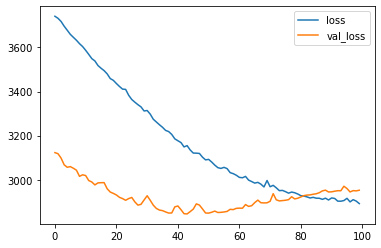

In [163]:
losses.plot()

### Create predictions

In [164]:
# insert code here
predictions = model.predict(X_test)

### Evaluate the model

In [131]:
# insert code here
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
print("Mean Absolute Error",mean_absolute_error(y_test,predictions))
print("Mean Squared Error",np.sqrt(mean_squared_error(y_test,predictions)))
print("Explained Variance Score",explained_variance_score(y_test,predictions))


Mean Absolute Error 43.77685214164562
Mean Squared Error 55.008080631742025
Explained Variance Score 0.43050822548983003


### Visualisation of cost

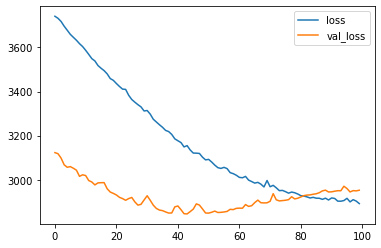

In [150]:
losses = pd.DataFrame(model.history.history)
losses.plot()

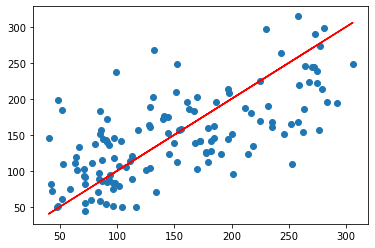

In [110]:
# insert code here
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')#bestfit line

### Visualisation of residuals

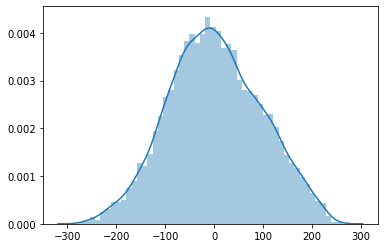

In [132]:
# insert code here
residuals = (y_test - predictions)
sns.distplot(residuals)

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



